In [97]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
# Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# Training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# Metrics
from sklearn.metrics import mean_absolute_error,accuracy_score, f1_score, confusion_matrix
# Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Print color
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

### Read data (csv)

In [98]:
data = pandas.read_csv('heart_disease_data.csv')
data
X = data.values[:,:-1] #other columns
Y = data.values[:, -1] #target

### Stadistics

In [99]:
data['target'].describe()
# for col in data:
#     print(data[col].describe(),"\n")

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [100]:
# target(1: have a heart disease, 0: no heart disease)
data['target'].value_counts() #165 do have a heart disease

1    165
0    138
Name: target, dtype: int64

### Correlation 

In [101]:
corr = data.corr() #-1 -> 1
corr.to_csv('correlation-matrix.csv')
corr
# Absolute correlation
absCorr = data.corr()
corr2 = pandas.DataFrame(np.round(np.abs(absCorr.values),2), index = absCorr.index, columns=absCorr.columns)
corr2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00,0.10,0.07,0.28,0.21,0.12,0.12,0.40,0.10,0.21,0.17,0.28,0.07,0.23
sex,0.10,1.00,0.05,0.06,0.20,0.05,0.06,0.04,0.14,0.10,0.03,0.12,0.21,0.28
cp,0.07,0.05,1.00,0.05,0.08,0.09,0.04,0.30,0.39,0.15,0.12,0.18,0.16,0.43
trestbps,0.28,0.06,0.05,1.00,0.12,0.18,0.11,0.05,0.07,0.19,0.12,0.10,0.06,0.14
chol,0.21,0.20,0.08,0.12,1.00,0.01,0.15,0.01,0.07,0.05,0.00,0.07,0.10,0.09
fbs,0.12,0.05,0.09,0.18,0.01,1.00,0.08,0.01,0.03,0.01,0.06,0.14,0.03,0.03
restecg,0.12,0.06,0.04,0.11,0.15,0.08,1.00,0.04,0.07,0.06,0.09,0.07,0.01,0.14
thalach,0.40,0.04,0.30,0.05,0.01,0.01,0.04,1.00,0.38,0.34,0.39,0.21,0.10,0.42
exang,0.10,0.14,0.39,0.07,0.07,0.03,0.07,0.38,1.00,0.29,0.26,0.12,0.21,0.44
oldpeak,0.21,0.10,0.15,0.19,0.05,0.01,0.06,0.34,0.29,1.00,0.58,0.22,0.21,0.43


[Text(0.5, 0, 'Women(0) or men(1)')]

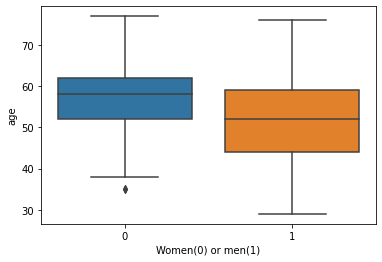

In [102]:
sns.boxplot(data=data, x='target', y='age').set(xlabel='Women(0) or men(1)')

<AxesSubplot:xlabel='target', ylabel='thalach'>

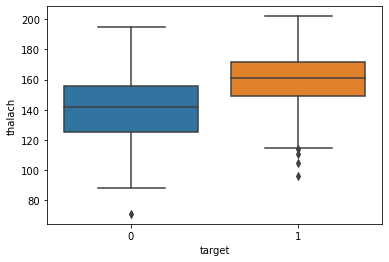

In [103]:
sns.boxplot(data=data, x='target', y='thalach')

### Dimensionality Reduction (LDA)

In [104]:
# modelPCA = PCA()
# model.fit(Ytrain)
# Xtrain2 = model.transform(Xtrain)
# Xtest2 = model.transform(Xtest)
# X = modelPCA.fit_transform(X)

# modelLDA = LinearDiscriminantAnalysis()
# X = modelLDA.fit_transform(X,Y)

### Train (70% train, 30% test)

In [105]:
# X = data.values[:,:-1] #other columns
# Y = data.values[:, -1] #target
print("*X shape: ",X.shape," *Y shape: ",Y.shape)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.30, random_state=0)
print('*Xtrain: ',Xtrain.shape,'  *Xtest: ',Ytest.shape)

*X shape:  (303, 13)  *Y shape:  (303,)
*Xtrain:  (212, 13)   *Xtest:  (91,)


### Models Test

In [106]:
# dimensionality reduction
modelPCA = PCA()
modelPCA.fit(Xtrain)
Xtrain2 = modelPCA.transform(Xtrain)
Xtest2 = modelPCA.transform(Xtest)

# k-folds
X = data.values[:,:-1] #other columns
features = data.columns
Y = data.values[:, -1] #target
kf = KFold(n_splits=30, random_state=0, shuffle=True)

# models 
resNaive,resLog,resDes, resRandFo, resSVC = [],[],[],[],[]
for train_idx, test_idx in kf.split(X): #aquí verdaderamente hace split
    Xtrain, Ytrain = X[train_idx,:], Y[train_idx]
    Xtest, Ytest = X[test_idx,:], Y[test_idx]
    #Naive Bayes
    model = GaussianNB()
    model.fit(Xtrain,Ytrain)
    Ypred = model.predict(Xtest)
    resNaive.append(f1_score(Ytest,Ypred)) 
    #Logistic Regression
    model = LogisticRegression(random_state=0)
    model.fit(Xtrain,Ytrain)
    Ypred = model.predict(Xtest)
    resLog.append(f1_score(Ytest,Ypred))
    #Decision Tree
    model = DecisionTreeClassifier(random_state=0)
    model.fit(Xtrain,Ytrain)
    Ypred = model.predict(Xtest)
    resDes.append(f1_score(Ytest,Ypred))
    #SVC
    model = SVC()
    model.fit(Xtrain,Ytrain)
    Ypred = model.predict(Xtest)
    resSVC.append(f1_score(Ytest,Ypred))
    #Random Forest
    model = RandomForestClassifier()
    model.fit(Xtrain,Ytrain)
    Ypred = model.predict(Xtest)
    resRandFo.append(f1_score(Ytest,Ypred))
    

# # decision 
# model = DecisionTreeClassifier(random_state=0)
# model.fit(Xtrain2,Ytrain)
# Ypred = model.predict(Xtest2)
# print("test: ",Ytest)
# print("\npred: ",Ypred)
# print("-----------------------------------------------------------------------------------------------------------------------------")
# print('--> Accuracy:', accuracy_score(Ytest,Ypred))
# print('--> F1:', f1_score(Ytest,Ypred)) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_


***** features *****
0 - age
1 - sex
2 - cp
3 - trestbps
4 - chol
5 - fbs
6 - restecg
7 - thalach
8 - exang
9 - oldpeak
10 - slope
11 - ca
12 - thal
13 - target

***** Feature importance *****
0 - 0.087870423496915
1 - 0.036541914613080186
2 - 0.14056120063290037
3 - 0.07651192919157551
4 - 0.0768337022167231
5 - 0.00876897439847036
6 - 0.016922748849159435
7 - 0.11007551343927288
8 - 0.06958974601021838
9 - 0.10802556472336916
10 - 0.0519569187667017
11 - 0.11252411666101875
12 - 0.10381724700059523


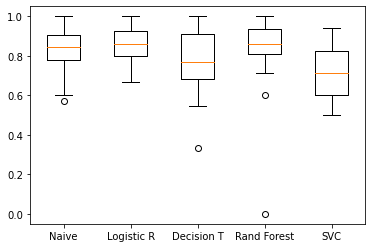

In [112]:
print("\n***** features *****")
for i in range(0, features.size):
    print(i,"-",features[i])
print("\n***** Feature importance *****")
for i in range(0, model.feature_importances_.size):
    print(i,"-",model.feature_importances_[i])
#print("importance: \n\t",model.feature_importances_)


plt.figure()
plt.boxplot([resNaive,resLog,resDes,resRandFo, resSVC])
plt.xticks([1,2,3,4,5],["Naive","Logistic R","Decision T", "Rand Forest", "SVC"])
plt.show()

#random forest, supervector machine

## Predict either a pacient has or not a heart disease

##### INPUT VALUES:
    -age
    -sex (1 = male; 0 = female)
    -chest pain type (0,1,2,3)
    -resting blood pressure in mm Hg
    -serum cholestoral in mg/dl
    -fasting blood sugar > 120 mg/dl
    -resting electrocardiographic results (values 0,1,2)
    -maximum heart rate achieved
    -exercise induced angina (1 = yes; 0 = no)
    -oldpeak = ST depression induced by exercise relative to rest
    -the slope of the peak exercise ST segment
    -number of major vessels (0-3) colored by flourosopy
    -thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
    
    # Examples:
        -patient who has a heart disease:    41 0 1 130 204 0 0 172 0 1.4 2 0 2
        -patient who hasn't a heart disease: 62 0 0 140 268 0 0 160 0 3.6 0 2 2
    # Real life examples:
        -patient prone to heart disease:     55 1 1 180 200 0 0 180 0 1.3 2 0 2
        -patient with no heart disease:      65 0 0 160 200 0 0 130 0 3.4 0 2 2

In [111]:
# Input data 
#lst = (41,0,1,130,204,0,0,172,0,1.4,2,0,2) # Disease
#lst = (62,0,0,140,268,0,0,160,0,3.6,0,2,2) # NO disease

# User input
lst = input('Input data: ').split() #User's input
arr = np.asarray(lst,dtype=float)
reshaped = arr.reshape(1,-1)

# Prediction
pred = model.predict(reshaped) #Logistic Regression
print("--> Logistic prediction: ",pred[0],"\n")

if(pred[0] == 0):
    print(bcolors.OKBLUE+ "\t ** The patient does not have any heart disease :D **" + bcolors.ENDC)
else:
    print(bcolors.FAIL+ "\t ** The patient has a heart disease :( **" + bcolors.ENDC)

Input data: 62 0 0 140 268 0 0 160 0 3.6 0 2 2
--> Logistic prediction:  0.0 

	 ** The patient does not have any heart disease :D **
